# Imports

In [ ]:
# Standard Imports
import os

# Third-Party Imports
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import image_dataset_from_directory

import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.offline as pyo
pyo.init_notebook_mode()

import numpy as np
import pandas as pd

# Utility Functions

## Plotting

In [2]:
# Plotting functions
def plot_data(x=None, y=None, z=None, title="", x_label="", y_label="", name="", mode="markers", text="", **traces):
    fig = go.Figure(layout={
        "title": title,
        "xaxis": {"title": x_label},
        "yaxis": {"title": y_label}
    })
    
    if z is None:
        data = go.Scatter(
            x=x,
            y=y,
            mode=mode,
            name=name,
            text=text
        )
    else:
        data = go.Scatter3d(
            x=x,
            y=y,
            z=z,
            mode=mode,
            name=name,
            text=text
        )

    if x is not None and y is not None:
        fig.add_trace(data)
    
    for t in traces:
        fig.add_trace(traces[t])
    
    return fig

def create_trace(x=None, y=None, z=None, name="", mode="lines", text="", marker_size=None):
    if z is None:
        trace = go.Scatter(
            x=x,
            y=y,
            mode=mode,
            name=name,
            text=text,
            marker=dict(size=marker_size)
        )
    else:
        trace = go.Scatter3d(
            x=x,
            y=y,
            z=z,
            mode=mode,
            name=name,
            text=text,
            marker=dict(size=marker_size)
        )
    
    return trace

# Loading Data

In [46]:
dir_name = "Images"
img_h = 140
img_w = 140
batch_size = 32

label_map = {0: "evil", 1: "good"}

train_ds, val_ds = image_dataset_from_directory(
    dir_name, 
    validation_split=0.2,
    subset="both",
    seed=123,
    image_size=(img_h, img_w),
    batch_size=batch_size
)

Found 597 files belonging to 2 classes.
Using 478 files for training.
Using 119 files for validation.


evil



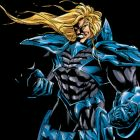

good



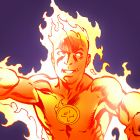

good



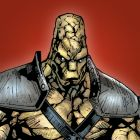

good



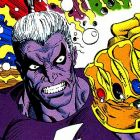

good



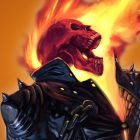

good



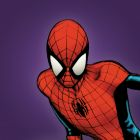

good



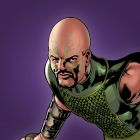

good



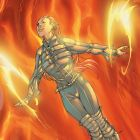

good



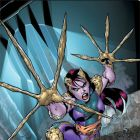

good



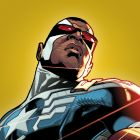

good



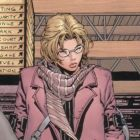

good



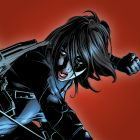

good



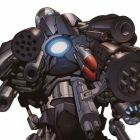

good



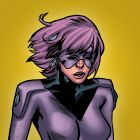

good



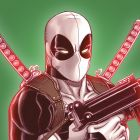

good



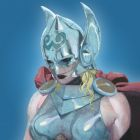

evil



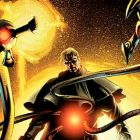

evil



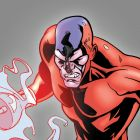

evil



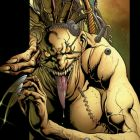

good



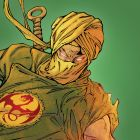

evil



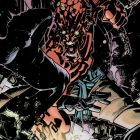

evil



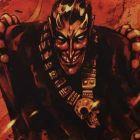

good



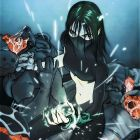

good



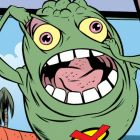

evil



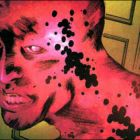

good



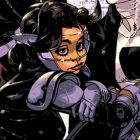

evil



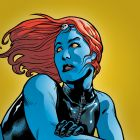

good



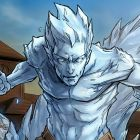

good



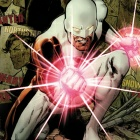

good



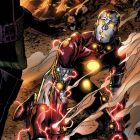

good



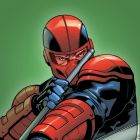

good



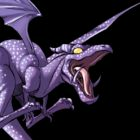

In [52]:
for images, labels in val_ds.take(1):
    for i in range(batch_size):
        print(label_map[labels[i].numpy()])
        px.imshow(images[i].numpy()).show()
        

In [37]:
for i in train_ds.take(1):
    print(i)

(<tf.Tensor: shape=(32, 140, 140, 3), dtype=float32, numpy=
array([[[[254., 254., 254.],
         [254., 254., 254.],
         [254., 254., 254.],
         ...,
         [254., 254., 254.],
         [254., 254., 254.],
         [254., 254., 254.]],

        [[254., 254., 254.],
         [254., 254., 254.],
         [254., 254., 254.],
         ...,
         [254., 254., 254.],
         [254., 254., 254.],
         [254., 254., 254.]],

        [[254., 254., 254.],
         [254., 254., 254.],
         [254., 254., 254.],
         ...,
         [254., 254., 254.],
         [254., 254., 254.],
         [254., 254., 254.]],

        ...,

        [[255., 253., 254.],
         [255., 253., 254.],
         [254., 254., 254.],
         ...,
         [253., 255., 252.],
         [253., 255., 252.],
         [253., 255., 252.]],

        [[255., 253., 254.],
         [255., 253., 254.],
         [254., 254., 254.],
         ...,
         [253., 255., 252.],
         [253., 255., 252.],
       